In [1]:
import numpy as np
import itertools

In [2]:
program=np.loadtxt('./D11input.txt',delimiter=',',dtype=int)
# print(len(program))
program=np.concatenate([program,np.zeros(100000).astype(int)])

In [3]:
def diagno2(index,data,input_arr,base_in):
    ind=index #position of the pointer
    input_ind=0 #pointer of the phase settings and input
    output=[]
    base=base_in
    store=0
    a=data.copy()
    while(True):
        instr=list(reversed(str(a[ind])))
        if len(instr)<5:
            for i in range(5-len(instr)):
                instr.append('0')

        if instr[1]!='0':
            if (instr[0]=='9')&(instr[1]=='9'):
                output='Halt!' #amplifier terminates by itself
                break
            else:
                print('second digit not zero')
                break


        if instr[0] in '1256789':
            if instr[-1]=='1':
                print('stores in immediate mode!')
                break
            para=np.zeros(2).astype(int)
            for i,it in enumerate(instr[2:4]):
                if it=='0':
                    para[i]=a[a[ind+1+i]]
                elif it=='1':
                    para[i]=a[ind+1+i]
                elif it=='2':
                    para[i]=a[base+a[ind+1+i]]
                    
            if instr[0] in '12789':
                ind_temp=ind
                if instr[0]=='1':
                    store=para[0]+para[1]
                    ind+=4
                elif instr[0]=='2':
                    store=para[0]*para[1]
                    ind+=4
                elif instr[0]=='7':
                    if para[0]<para[1]:
                        store=1
                    else:
                        store=0
                    ind+=4
                elif instr[0]=='8':
                    if para[0]==para[1]:
                        store=1
                    else:
                        store=0
                    ind+=4
                elif instr[0]=='9':
                    base+=para[0]
                    ind+=2

                if instr[-1]=='0':
                    a[a[ind_temp+3]]=store
                if instr[-1]=='2':
                    a[base+a[ind_temp+3]]=store
                
            elif instr[0]=='5':
                if para[0]!=0:
                    ind=para[1]
                else:
                    ind+=3
            elif instr[0]=='6':
                if para[0]==0:
                    ind=para[1]
                else:
                    ind+=3

        elif instr[0]=='3':
            if instr[2]=='0':
                a[a[ind+1]]=int(input_arr[input_ind]) #phase settings or inputs
            elif instr[2]=='2':
                a[base+a[ind+1]]=int(input_arr[input_ind])
            input_ind+=1
            ind+=2
            
        elif instr[0]=='4':
            if instr[2]=='0':
                output.append(a[a[ind+1]])
            elif instr[2]=='1':
                output.append(a[ind+1])
            elif instr[2]=='2':
                output.append(a[base+a[ind+1]])
            ind+=2
        else:
            print('must be 1-9!')
            break
            
        if len(output)==2:
            break

    #return outputs and save the status of the amplifier
    return output, ind, a, base

In [4]:
n_size=90
field=np.zeros((n_size,n_size),dtype=int)
painted=np.zeros_like(field,dtype=int)
x=n_size//2-1
y=n_size//2-1
field[x,y]=1
pcopy=program.copy()
out=0
ind=0
directions=[[-1,0],[0,-1],[1,0],[0,1]] #U,L,D,R
d_ind=0
base_in=0
while True:
    out,ind,pcopy,base_in=diagno2(ind,pcopy,[field[x][y]],base_in)
    if out=='Halt!':
        break
#     print(out)
    field[x][y]=out[0] # paint
    if painted[x][y]==0: # already painted or not
        painted[x][y]=1
    if out[1]==0:
        # turn and move
        d_ind=(d_ind+1)%4
    elif out[1]==1:
        d_ind=(d_ind-1)%4
    x+=directions[d_ind][0] 
    y+=directions[d_ind][1]

In [5]:
(painted==1).sum()

249

In [6]:
import matplotlib.pyplot as plt

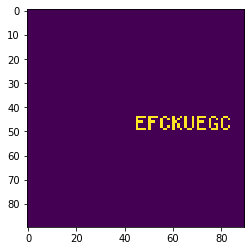

In [7]:
plt.imshow(field, interpolation='nearest')
plt.show()